In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
import healpy as hp
from healpy.visufunc import projplot
import os
import sys
sys.path.insert(0, '/home/aew492/lss-dipoles')
import tools
from Secrest_dipole import SecrestDipole

Measure the dipole in the CatWISE AGN sample, and Quaia, with and without the bright galaxy masks.

In [3]:
# kwargs for plotting dipole direction
kwargs = dict(marker='o', alpha=0.7, mec='k')

### Catwise

In [4]:
catwise_kwargs = dict(initial_catfn='catwise_agns_master.fits', blim=30,
                      catname='catwise_agns', mag='w1', maglim=16.4, load_init=False)

#### without galaxy masks

amp = 0.029250
direction:  <SkyCoord (Galactic): (l, b) in deg
    (237.47933777, 11.7205834)>


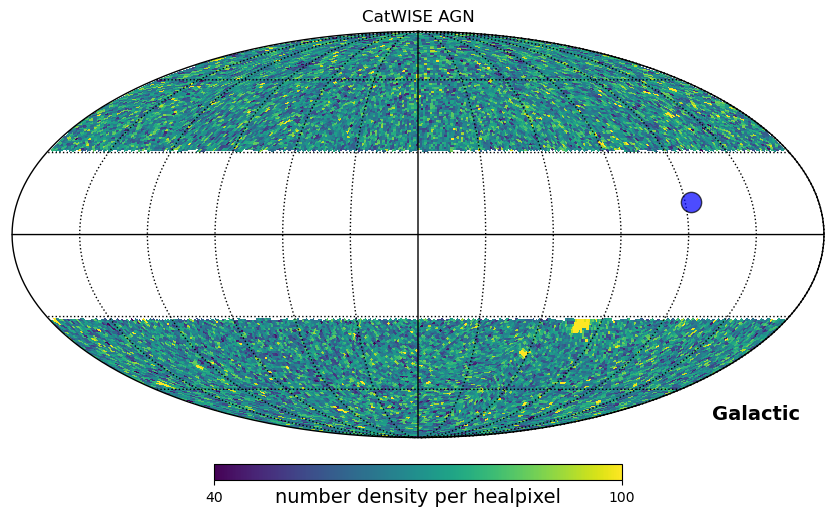

In [5]:
d = SecrestDipole(save_tag='_nogalmasks', **catwise_kwargs)
map_= d.load_hpxelatcorr()
d.plot_map(map_, min=40, max=100, title='CatWISE AGN')
dipamp, dipdir = d.compute_dipole(map_, verbose=True)
d.plot_dipole(dipdir, ms=500*dipamp, color='b', **kwargs)

#### with MC masks

amp = 0.024714
direction:  <SkyCoord (Galactic): (l, b) in deg
    (221.4339438, 19.30800124)>


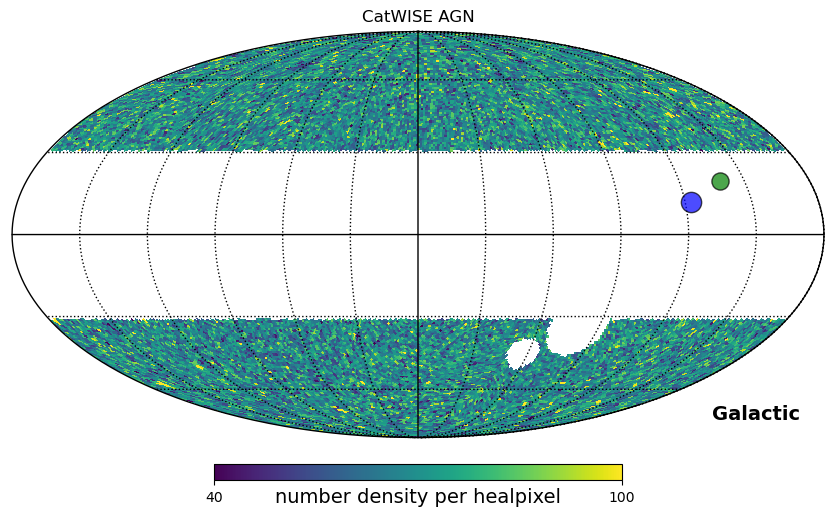

In [6]:
d_mc = SecrestDipole(save_tag='_r1.0_MCs-mask', **catwise_kwargs)
map_= d_mc.load_hpxelatcorr()
d_mc.plot_map(map_, min=40, max=100, title='CatWISE AGN')
dipamp_mc, dipdir_mc = d_mc.compute_dipole(map_, verbose=True)
d_mc.plot_dipole(dipdir_mc, ms=500*dipamp_mc, color='g', **kwargs)
d.plot_dipole(dipdir, ms=500*dipamp, color='b', **kwargs)

#### with masks

amp = 0.014989
direction:  <SkyCoord (Galactic): (l, b) in deg
    (240.29851794, 28.95729055)>


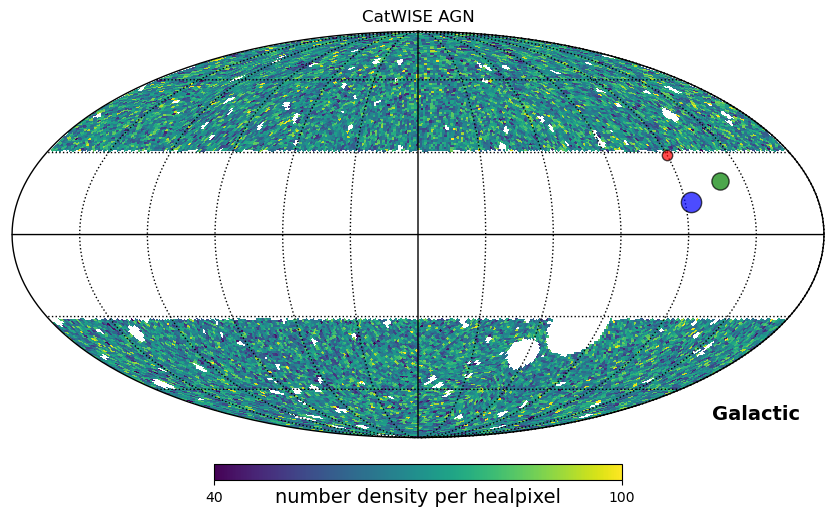

In [7]:
d_m = SecrestDipole(save_tag='_r1.0', **catwise_kwargs)
map_= d_m.load_hpxelatcorr()
d_m.plot_map(map_, min=40, max=100, title='CatWISE AGN')
dipamp_m, dipdir_m = d_m.compute_dipole(map_, verbose=True)
d_m.plot_dipole(dipdir_m, ms=500*dipamp_m, color='r', **kwargs)
d_mc.plot_dipole(dipdir_mc, ms=500*dipamp_mc, color='g', **kwargs)
d.plot_dipole(dipdir, ms=500*dipamp, color='b', **kwargs)

In [8]:
dipamp / dipamp_m

1.9514421489921288

### Quaia

In [9]:
quaia_kwargs = dict(initial_catfn='quaia_G20.0.fits', blim=30,
                      catname='quaia', mag='G', maglim=20., load_init=False, compcorrect=True)

#### without galaxy masks

amp = 0.018594
direction:  <SkyCoord (Galactic): (l, b) in deg
    (310.40833956, 30.4659608)>


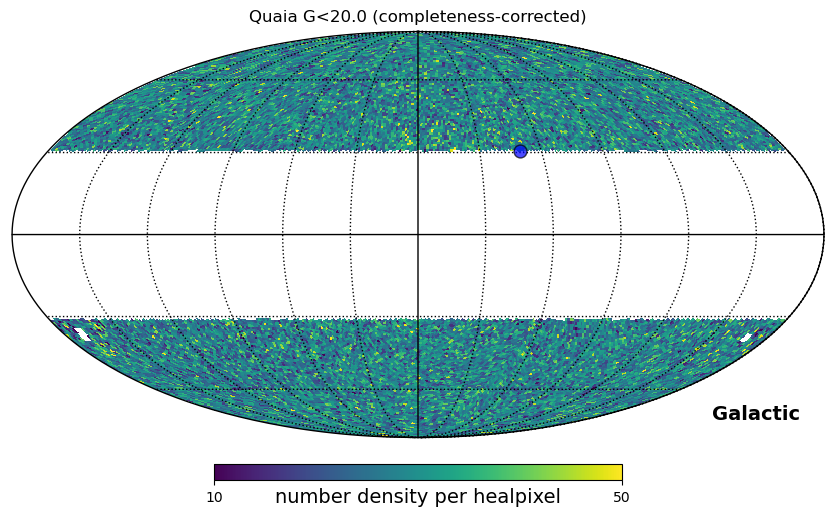

In [10]:
d = SecrestDipole(save_tag='_nogalmasks', **quaia_kwargs)
map_= d.load_hpxelatcorr()
d.plot_map(map_, min=10, max=50, title='Quaia G<20.0 (completeness-corrected)')
dipamp, dipdir = d.compute_dipole(map_, verbose=True)
d.plot_dipole(dipdir, ms=500*dipamp, color='b', **kwargs)

#### with MC masks

amp = 0.019737
direction:  <SkyCoord (Galactic): (l, b) in deg
    (307.90735143, 27.13884418)>


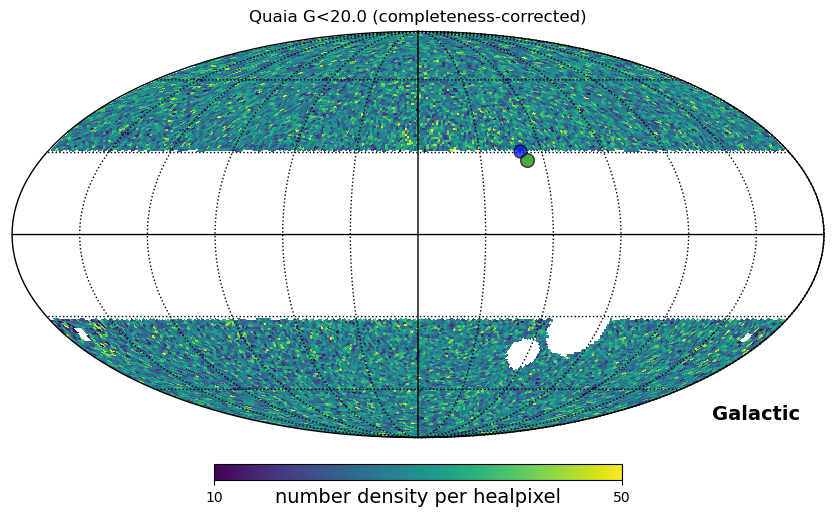

In [11]:
d_mc = SecrestDipole(save_tag='_r1.0_MCs-mask', **quaia_kwargs)
map_= d_mc.load_hpxelatcorr()
d_mc.plot_map(map_, min=10, max=50, title='Quaia G<20.0 (completeness-corrected)')
dipamp_mc, dipdir_mc = d_mc.compute_dipole(map_, verbose=True)
d.plot_dipole(dipdir, ms=500*dipamp, color='b', **kwargs)
d_mc.plot_dipole(dipdir_mc, ms=500*dipamp_mc, color='g', **kwargs)

#### with masks

amp = 0.019562
direction:  <SkyCoord (Galactic): (l, b) in deg
    (308.26733978, 26.33489387)>


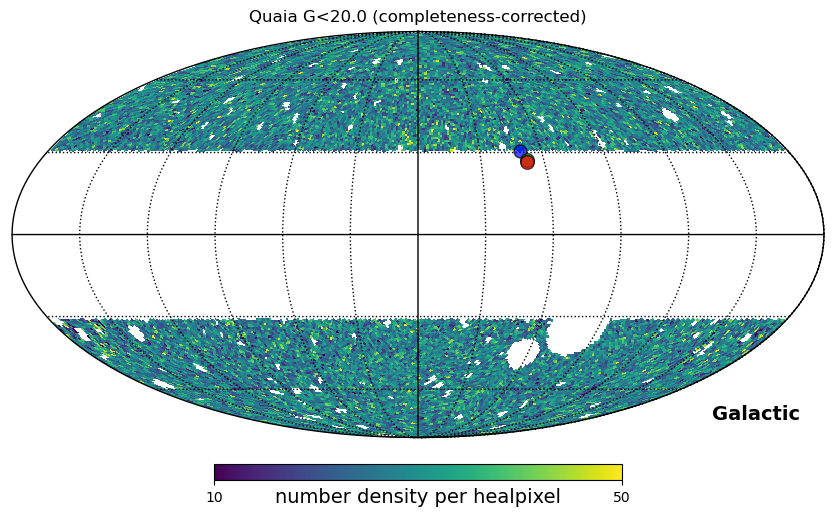

In [12]:
d_m = SecrestDipole(save_tag='_r1.0', **quaia_kwargs)
map_= d_m.load_hpxelatcorr()
d_m.plot_map(map_, min=10, max=50, title='Quaia G<20.0 (completeness-corrected)')
dipamp_m, dipdir_m = d_m.compute_dipole(map_, verbose=True)
d.plot_dipole(dipdir, ms=500*dipamp, color='b', **kwargs)
d_mc.plot_dipole(dipdir_mc, ms=500*dipamp_mc, color='g', **kwargs)
d_m.plot_dipole(dipdir_m, ms=500*dipamp_m, color='r', **kwargs)

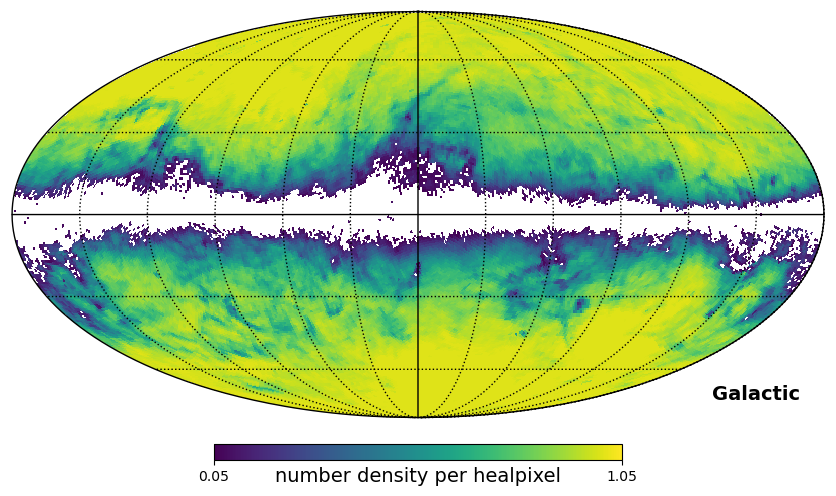

In [13]:
# selection function
selfunc = d.load_selfunc()
selfunc[selfunc==0.] = np.nan
tools.mollview(selfunc, coord=['C','G'], badcolor='w', min=.05, max=1.05)